In [ ]:
import math

import matplotlib.pylab as pl
from PIL import Image
import numpy as np
from skimage.io import imread, imsave, imshow, show
from skimage import color

2048 1365 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


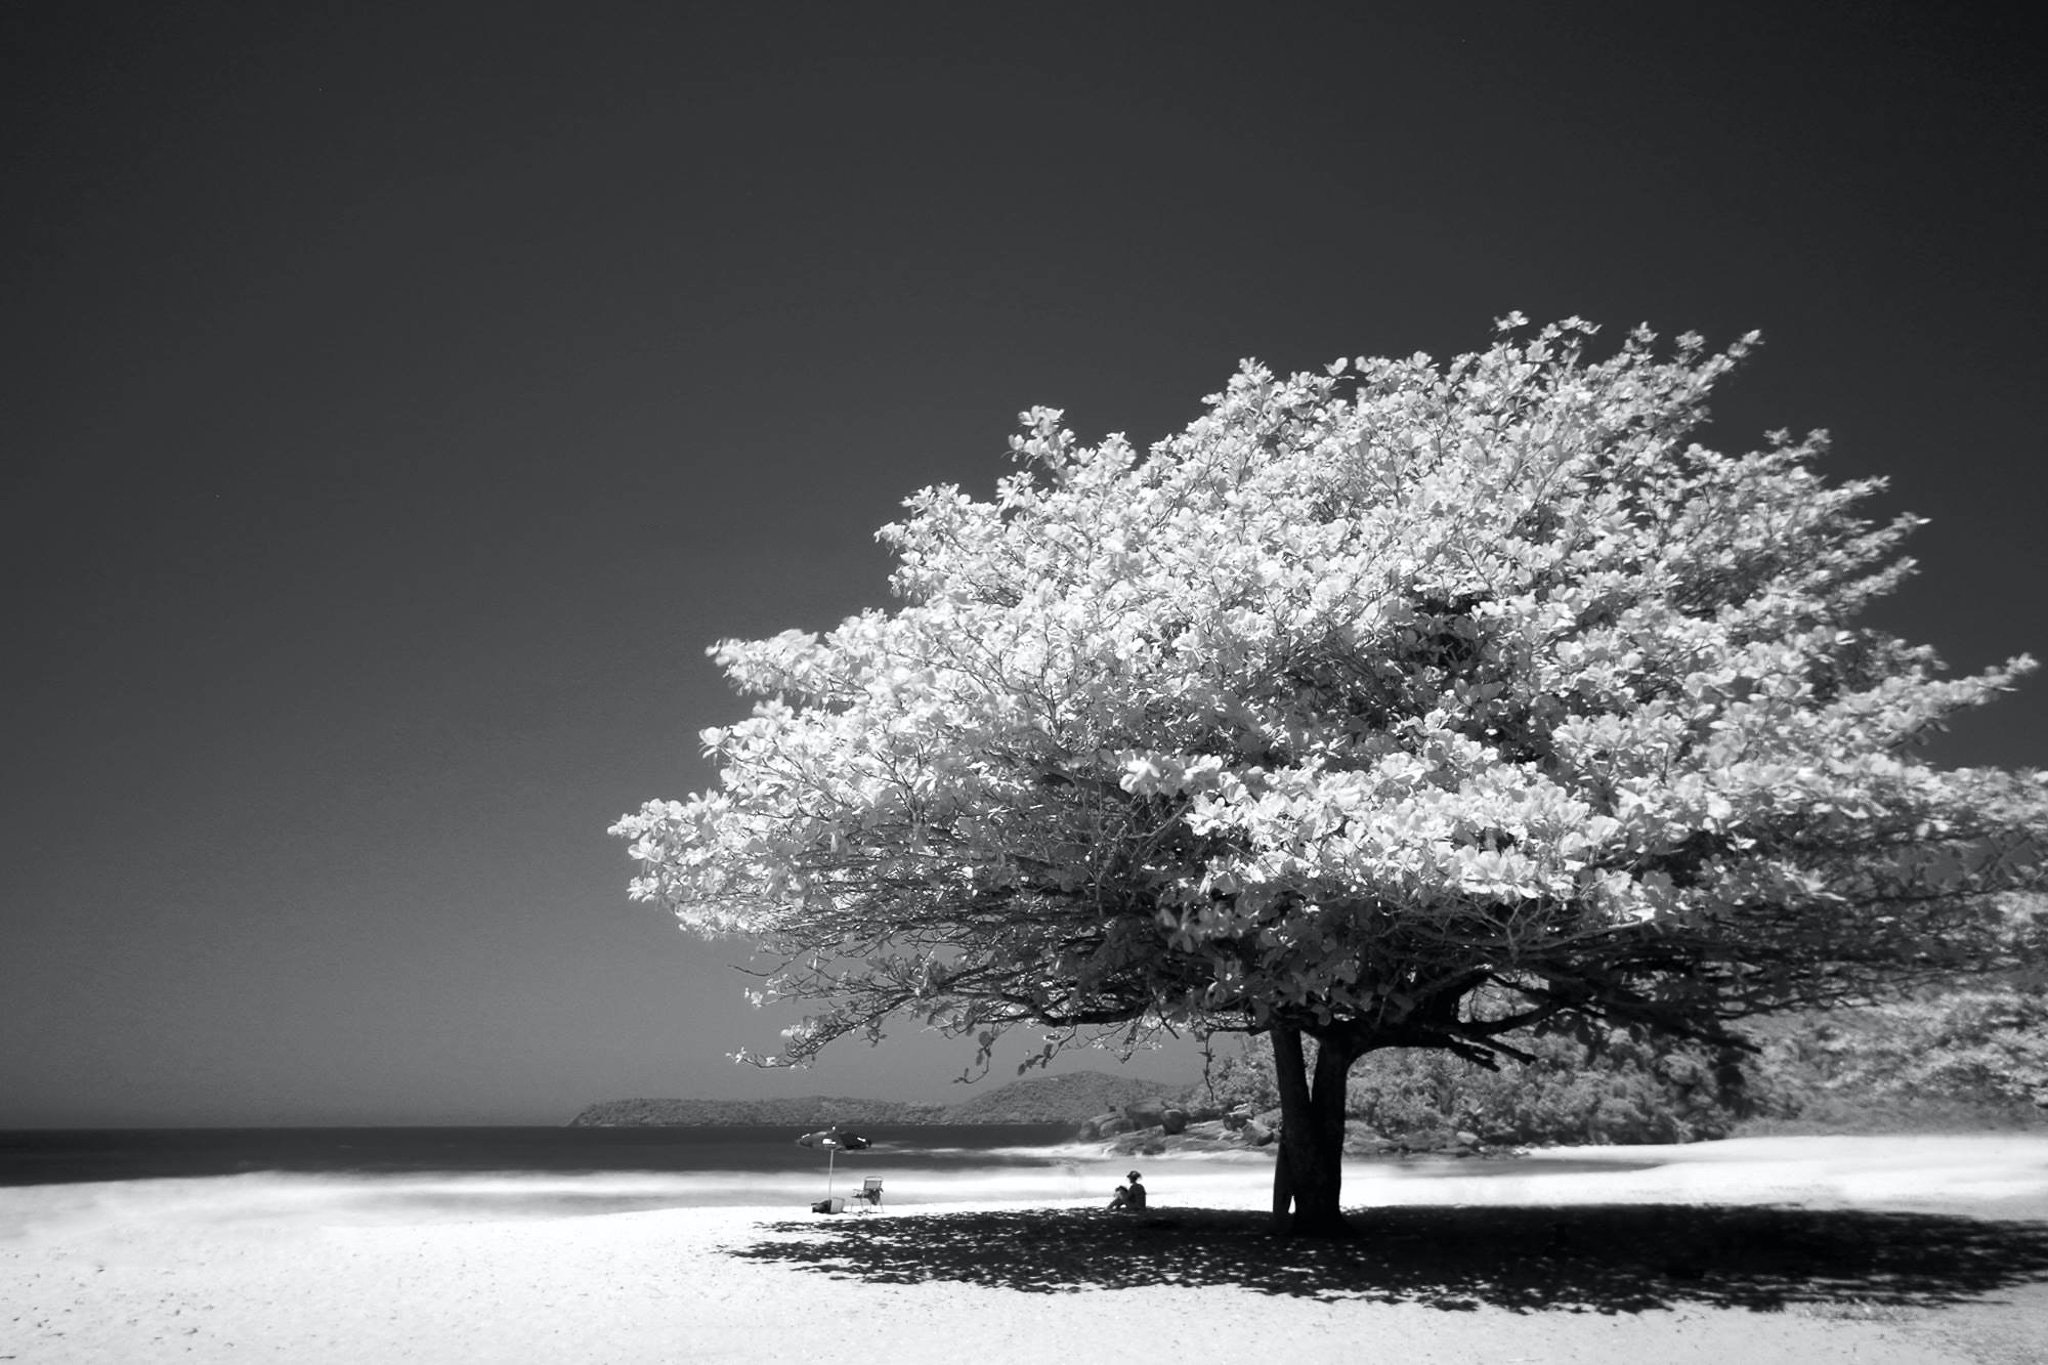

In [ ]:
org = Image.open('tree.jpg')
print(org.width, org.height, org.mode, org.format, type(org))

org

In [ ]:
img = np.array(org)

In [ ]:
# Histogram Stretching
# Histogram Shrinking

def stretching(img, min_desired, max_desired):
    w = img.shape[0]
    h = img.shape[1]

    min = 255
    max = 0

    for x in range(w):
        for y in range(h):
            v = img[x, y]
            if min > v:
                min = v
            if max < v:
                max = v

    k = (max_desired - min_desired) / (max - min)
    print(min, max, k)

    for x in range(w):
        for y in range(h):
            img[x, y] = k * (img[x, y] - min) + min_desired

    return img

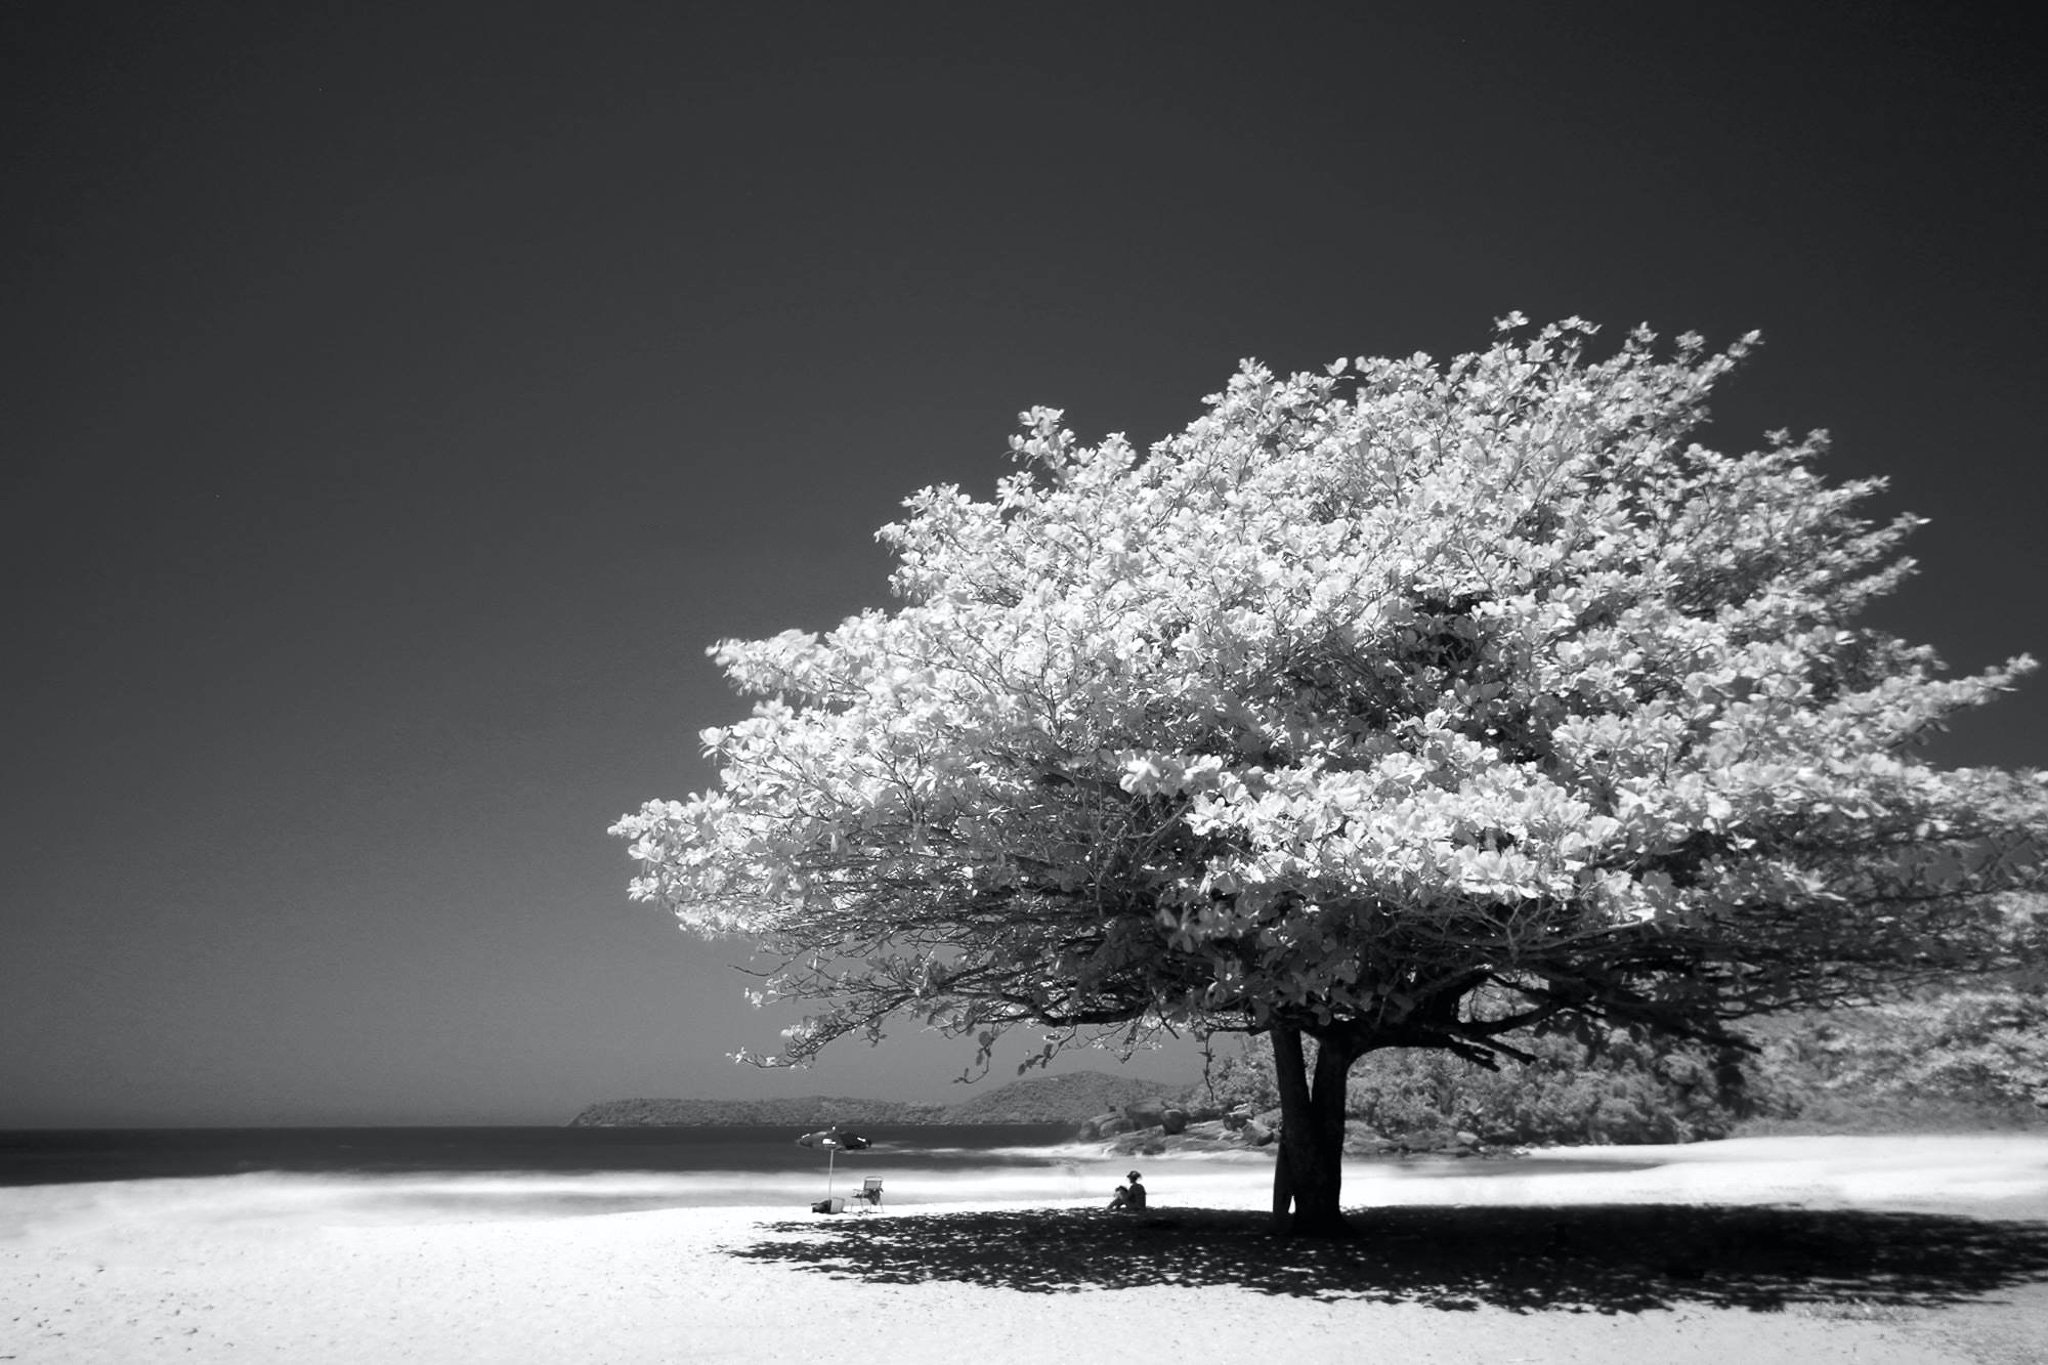

In [ ]:
org

In [ ]:
c1 = stretching(img.copy(), 0, 255)
r1 = Image.fromarray(c1)
r1

ValueError: ignored

2 236 0.5341880341880342


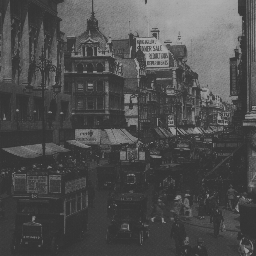

In [ ]:
# Shrinking

c2 = stretching(img.copy(), 50, 175)
r2 = Image.fromarray(c2)
r2

# Shrinking을 했는데 밝아 졌네요!
# 왜 그럴까요? 히스토그램을 확인해볼까요?

In [ ]:
img

array([[ 16,  23,  15, ..., 130,  60, 105],
       [ 16,  20,  12, ..., 113,  61, 130],
       [ 19,  25,  16, ..., 126,  52, 147],
       ...,
       [ 24,  18,  17, ...,  15,  12,  10],
       [ 19,  16,  15, ...,  17,  13,  11],
       [ 17,  22,  23, ...,  12,  13,  17]], dtype=uint8)

In [ ]:
c2

array([[ 57,  61,  56, ..., 118,  80, 105],
       [ 57,  59,  55, ..., 109,  81, 118],
       [ 59,  62,  57, ..., 116,  76, 127],
       ...,
       [ 61,  58,  58, ...,  56,  55,  54],
       [ 59,  57,  56, ...,  58,  55,  54],
       [ 58,  60,  61, ...,  55,  55,  58]], dtype=uint8)

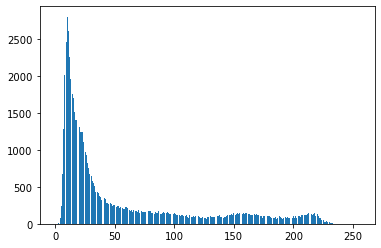

In [ ]:
h = Image.fromarray(img).histogram()
pl.bar(range(256), h)
pl.show()

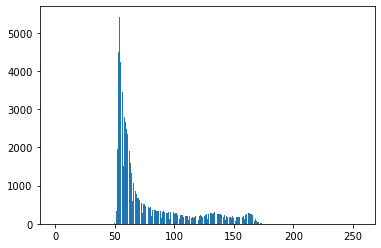

In [ ]:
h = Image.fromarray(c2).histogram()
pl.bar(range(256), h)
pl.show()

50 175 2.04


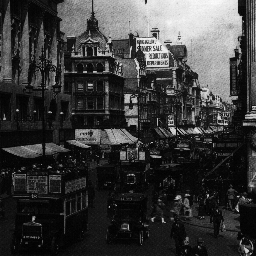

In [ ]:
c3 = stretching(c2.copy(), 0, 255)
r3 = Image.fromarray(c3)
r3

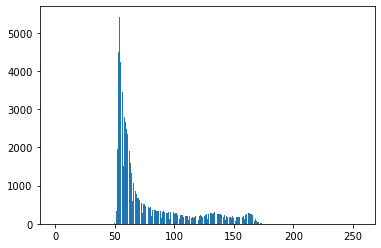

In [ ]:
h = Image.fromarray(c2).histogram()
pl.bar(range(256), h)
pl.show()

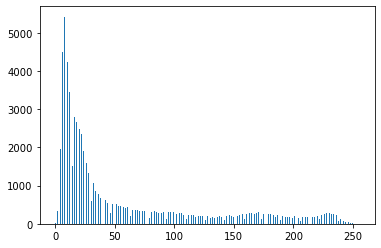

In [ ]:
h = Image.fromarray(c3).histogram()
pl.bar(range(256), h)
pl.show()

In [ ]:
# Histogram sliding
def sliding(img, offset):
    w = img.shape[0]
    h = img.shape[1]

    for x in range(w):
        for y in range(h):
            v = img[x, y] + offset
            if v > 255:
                img[x, y] = 255
            elif v < 0:
                img[x, y] = 0
            else:
                img[x, y] = v

    return img

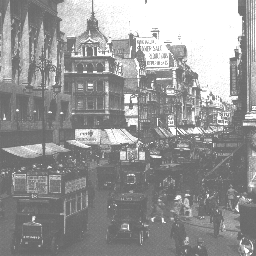

In [ ]:
c4 = sliding(img.copy(), 100)
r4 = Image.fromarray(c4)
r4

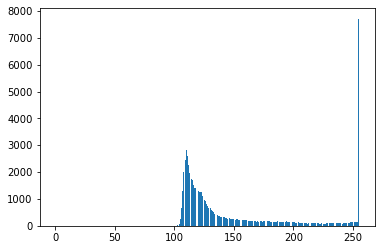

In [ ]:
h = Image.fromarray(c4).histogram()
pl.bar(range(256), h)
pl.show()

In [ ]:
def hist(img):
    w = img.shape[0]
    h = img.shape[1]

    H = dict()

    for i in range(256):
        H[i] = 0

    for x in range(w):
        for y in range(h):
            v = img[x, y]
            H[v] = H.get(v, 0) + 1

    return H

In [ ]:
H = hist(img)
H

NameError: name 'im' is not defined

In [ ]:
C

In [ ]:
def histogram_equalization(img):
    result = img.copy()

    H = hist(img)

    # 누적 분포
    C = dict()
    sum = 0
    for i in range(256):
        sum += H[i]
        C[i] = sum

    size = img.shape[0] * img.shape[1]

    R = dict()
    for i in range(256):
        R[i] = round(C[i] / size * 255)

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result[x, y] = R[img[x, y]]

    return result

In [ ]:
img_h = histogram_equalization(img)

In [ ]:
imshow(img_h)

In [ ]:
h = Image.fromarray(img_h).histogram()
pl.bar(range(256), h)
pl.show()

In [ ]:
pl.figure(figsize=(20,20))

pl.subplot(221), pl.imshow(img, 'gray')
pl.title('Original', size=20), pl.axis('off')

pl.subplot(222), pl.imshow(img_h, 'gray'),
pl.title('HE', size=20), pl.axis('off')

h1 = Image.fromarray(img).histogram()
pl.subplot(223), pl.bar(range(256), h1)

h2 = Image.fromarray(img_h).histogram()
pl.subplot(224), pl.bar(range(256), h2)

pl.show()